In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('housing.csv')
df = data.copy()

print(df.shape)
df.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


float64    9
object     1
Name: count, dtype: int64


longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
total_bedrooms        0.010029
dtype: float64

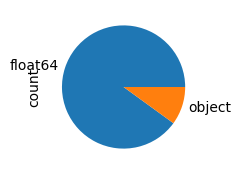

In [3]:
plt.figure(figsize=(2,2))
print(df.dtypes.value_counts())
df.dtypes.value_counts().plot.pie()

(df.isna().sum()/df.shape[0]).sort_values()

14999.0
500001.0
206855.81690891474
longitude


latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value


<Figure size 200x300 with 0 Axes>

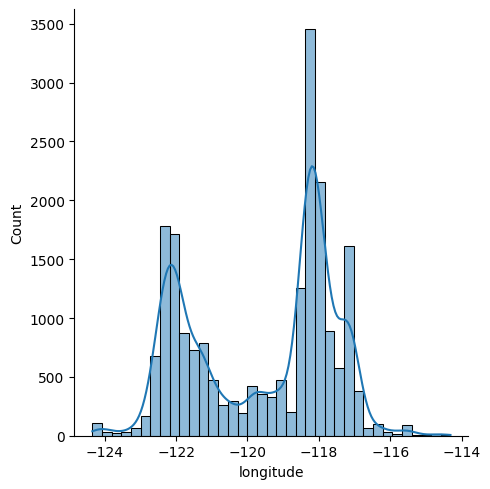

<Figure size 200x300 with 0 Axes>

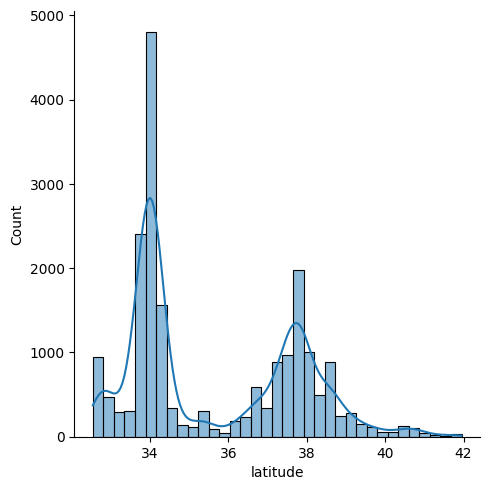

<Figure size 200x300 with 0 Axes>

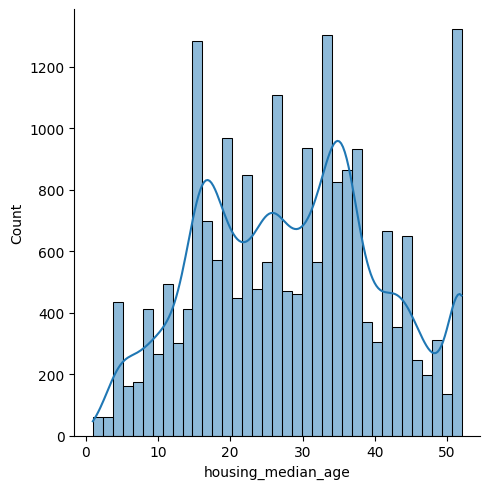

<Figure size 200x300 with 0 Axes>

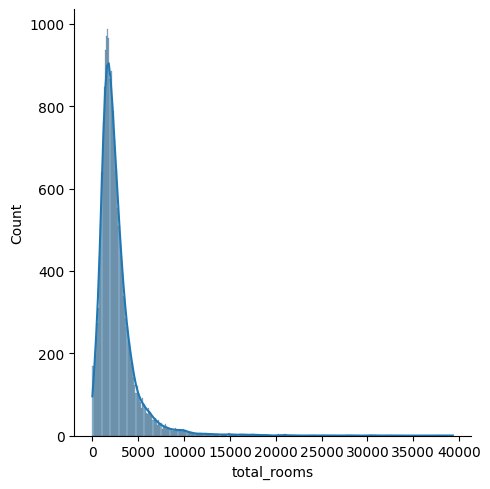

<Figure size 200x300 with 0 Axes>

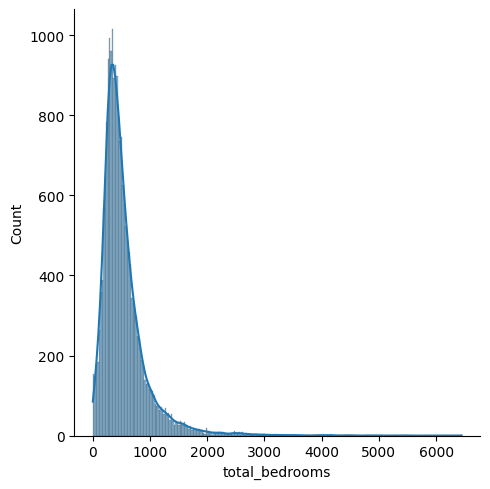

<Figure size 200x300 with 0 Axes>

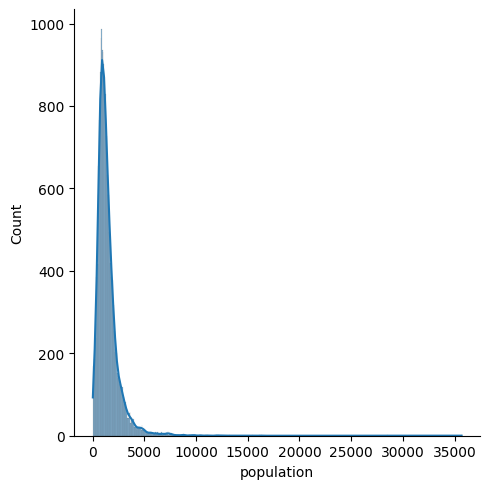

<Figure size 200x300 with 0 Axes>

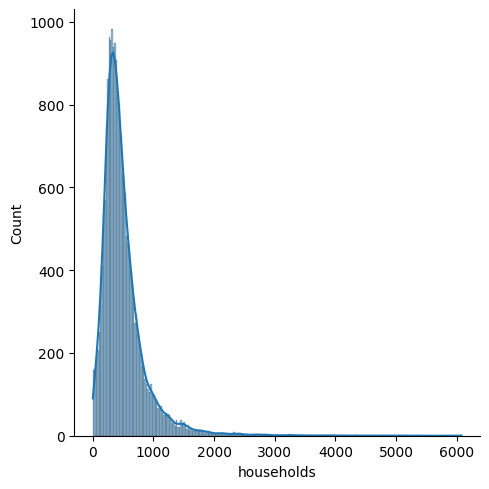

<Figure size 200x300 with 0 Axes>

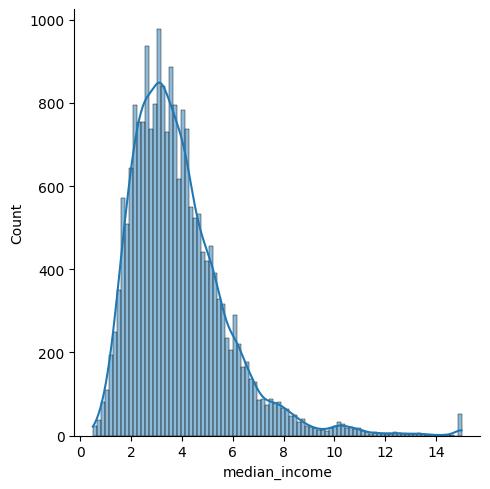

<Figure size 200x300 with 0 Axes>

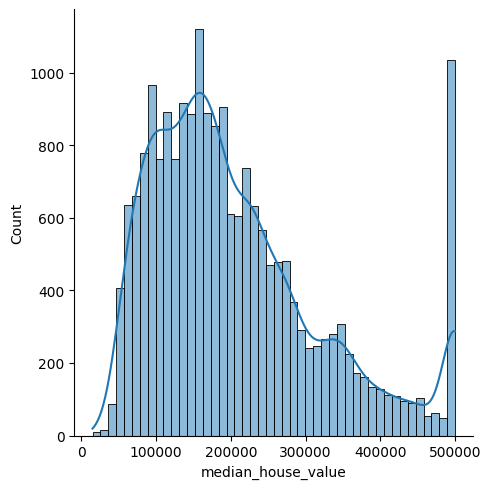

In [15]:
print(df['median_house_value'].min(axis=0))
print(df['median_house_value'].max(axis=0))
print(df['median_house_value'].mean())

for col in df.select_dtypes('float') :
    plt.figure(figsize=(2,3))
    print(col)
    sns.displot(df[col],kde=True)

In [ ]:
for col in df.select_dtypes('object'):
    print(f'{col:-<20} {df[col].unique()}')

X = df.drop('median_house_value', axis = 1)
y = df['median_house_value']
for col in X.select_dtypes('float') :
    plt.figure(figsize=(3,3))
    print(col)
    plt.scatter(X[col],y)



<Axes: >

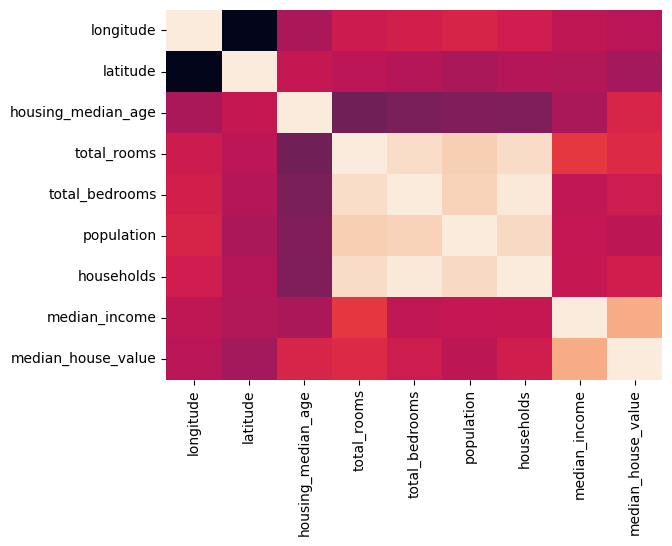

In [7]:
df1 = df.drop('ocean_proximity',axis=1)
sns.heatmap(df1.corr(), cbar=False)

In [2]:
from sklearn.model_selection import train_test_split,learning_curve,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest,f_classif,chi2
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('housing.csv')
df = data.copy()

print(df.shape)

trainset,testset = train_test_split(df,test_size=0.2,random_state=0)

def encodage(dataset):
    code = {
        "NEAR BAY": 1,
        "<1H OCEAN": 1,
        "INLAND": 0,
        "NEAR OCEAN": 1,
        "ISLAND": 1
    }
    for col in dataset.select_dtypes('object').columns:
        dataset.loc[:, col] = dataset[col].map(code)
    
    return dataset


(20640, 10)


In [3]:
def inputation(dataset) :    
    return dataset.dropna(axis=0)

def preprocessing(dataset) :
    dataset = encodage(dataset)
    dataset = inputation(dataset)
    X = dataset.drop('median_house_value', axis = 1)
    y = dataset['median_house_value']
    return X, y

X_train,y_train = preprocessing(trainset)
X_test,y_test = preprocessing(testset)

In [8]:
def evaluation(model) :
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model.score(X_test,y_pred))
    print(y_pred)


In [9]:
model = DecisionTreeRegressor(random_state=0)
evaluation(model)

1.0
[139800. 244000. 157700. ... 163300. 200600. 186500.]


In [12]:
def predict(model,long,larg,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,oceanProximity) :
    X = np.array([long,larg,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,oceanProximity]).reshape(1,9)
    model.fit(X_train,y_train)
    print(model.predict(X))

In [13]:
predict(model,-122.26,37.85,52.0,629.0,394.0,568.0,139.0,1.7321,1)

[126600.]


c:\Users\T\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
